In [1]:
import torch
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report


### Xception

In [2]:
def eval(predictions, metrics, thresh):

    # Load ground truth
    solution_df = pd.read_csv("./LOC_val_solution.csv", sep=",", header=None, names=["filename", "labels"])
    solution_df["labels"] = solution_df["labels"].str.split()
    solution_dict = dict(zip(solution_df["filename"], solution_df["labels"]))

    # Load synset mapping: index → synset
    with open("./LOC_synset_mapping.txt", "r") as f:
        idx_to_synset = [line.strip().split()[0] for line in f]

    # Build reverse mapping: synset → index
    synset_to_idx = {syn: i for i, syn in enumerate(idx_to_synset)}

    top1_correct = 0
    top5_correct = 0
    total = 0

    y_true = []
    y_pred = []

    # print(thresh, epsilon)

    for row in predictions.iterrows():
        filename = row[1]['filename']
        pred_indices = list(map(int, row[1]['top5'].strip('[]').split()))

        true_synsets = solution_dict.get(filename)
        if not true_synsets:
            continue

        pred_synsets = [idx_to_synset[i] for i in pred_indices]

        # Top-1 Accuracy
        if pred_synsets[0] in true_synsets:
            top1_correct += 1

        # Top-5 Accuracy
        if any(syn in true_synsets for syn in pred_synsets[:5]):
            top5_correct += 1

        total += 1

        # F1: choose the first label in ground truth (some have multiple)
        gt_synset = true_synsets[0]
        if gt_synset in synset_to_idx:
            y_true.append(synset_to_idx[gt_synset])
            y_pred.append(pred_indices[0])  # Top-1 prediction
        else:
            print(f"Skipping unknown synset: {gt_synset}")

    # Print accuracy
    # print(f"Threshold {thresh} Epsilon {epsilon}")
    print(f"Evaluated on {total} samples.")
    # print(f"Top-1 Accuracy: {top1_correct / total:.4f}")
    # print(f"Top-5 Accuracy: {top5_correct / total:.4f}")
    metrics[thresh]['Top-1 Accuracy'].append( top1_correct / total )
    metrics[thresh]['Top-5 Accuracy'].append( top5_correct / total )

    # Compute F1
    # print("\nClassification Report (Top-1):")
    # print(classification_report(y_true, y_pred, zero_division=0))  # Add zero_division=0 to suppress warnings
    # print(f"\nF1 Score (Top-1): {f1_score(y_true, y_pred, average='weighted')}") #evaluates classes that appear out of the 1000
    # print(f"\Precision Score (Top-1): {precision_score(y_true, y_pred, average='weighted')}") #evaluates classes that appear out of the 1000
    # print(f"\Recall Score (Top-1): {recall_score(y_true, y_pred, average='weighted')}") #evaluates classes that appear out of the 1000
    metrics[thresh]['F1'].append( f1_score(y_true, y_pred, average='weighted') )
    metrics[thresh]['Recall'].append( recall_score(y_true, y_pred, average='weighted') )
    metrics[thresh]['Precision'].append( precision_score(y_true, y_pred, average='weighted') )

    return metrics




metrics = {}
for thresh in ['1', '0.75', '0.5', '0.25', 'baseline' ]:
    metrics[thresh] = {'Top-1 Accuracy': [], 'Top-5 Accuracy': [], 'F1': [], 'Recall': [], 'Precision': []}

    if thresh == 'baseline':
        predictions = pd.read_csv(f"predictions/predictions_{thresh}.csv")
        predictions = predictions.drop_duplicates()
        eval(predictions, metrics, thresh)
        continue


    for epsilon in ['1e-7', '1e-5', '1e-3', '1e-2']:        

        # if thresh == '1':
        #     predictions = pd.read_csv(f"old_preds/predictions_{thresh}_{epsilon}.csv")
        # else:
        predictions = pd.read_csv(f"predictions/predictions_{thresh}_{epsilon}.csv")
        
        predictions = predictions.drop_duplicates()

        eval(predictions, metrics, thresh)

    # break


Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluated on 1000 samples.
Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluated on 999 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluated on 1000 samples.


/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ine5/projects/rrg-glatard/ine5/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
for thresh in ['1', '0.75', '0.5', '0.25']:
    for epsilon, f1 in zip(['1e-7', '1e-5', '1e-3', '1e-2'], metrics[thresh]['F1']) :        

        print(f'Threshold {thresh} Epsilon {epsilon}: ', (f1 - metrics['baseline']['F1'])*100 )

Threshold 1 Epsilon 1e-7:  [1.20380952]
Threshold 1 Epsilon 1e-5:  [1.21714286]
Threshold 1 Epsilon 1e-3:  [0.34380952]
Threshold 1 Epsilon 1e-2:  [-6.65214286]
Threshold 0.75 Epsilon 1e-7:  [1.13269841]
Threshold 0.75 Epsilon 1e-5:  [1.27936508]
Threshold 0.75 Epsilon 1e-3:  [0.50380952]
Threshold 0.75 Epsilon 1e-2:  [-6.7902381]
Threshold 0.5 Epsilon 1e-7:  [1.029559]
Threshold 0.5 Epsilon 1e-5:  [1.31714286]
Threshold 0.5 Epsilon 1e-3:  [0.09428571]
Threshold 0.5 Epsilon 1e-2:  [-6.68690476]
Threshold 0.25 Epsilon 1e-7:  [-23.3958808]
Threshold 0.25 Epsilon 1e-5:  [-22.8084721]
Threshold 0.25 Epsilon 1e-3:  [-22.50690476]
Threshold 0.25 Epsilon 1e-2:  [-38.14074047]


Epsilon: 1e-07, Skip count: 0.0012787176341751605
Epsilon: 1e-05, Skip count: 0.0012822741893796716
Epsilon: 0.001, Skip count: 0.0014473174850283994
Epsilon: 0.01, Skip count: 0.0029133388471365854


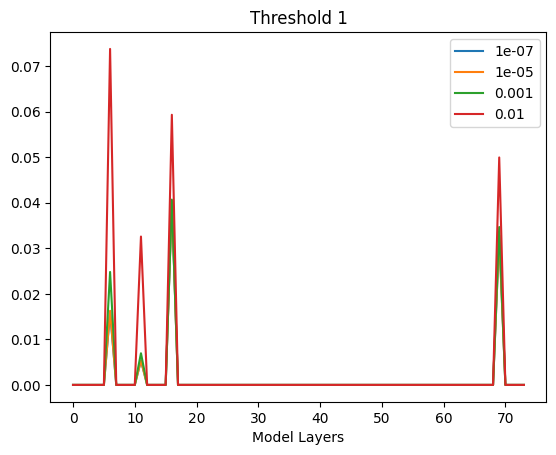

Epsilon: 1e-07, Skip count: 0.003388785978377832
Epsilon: 1e-05, Skip count: 0.0033929147078919746
Epsilon: 0.001, Skip count: 0.0038509973459220836
Epsilon: 0.01, Skip count: 0.005688769842728409


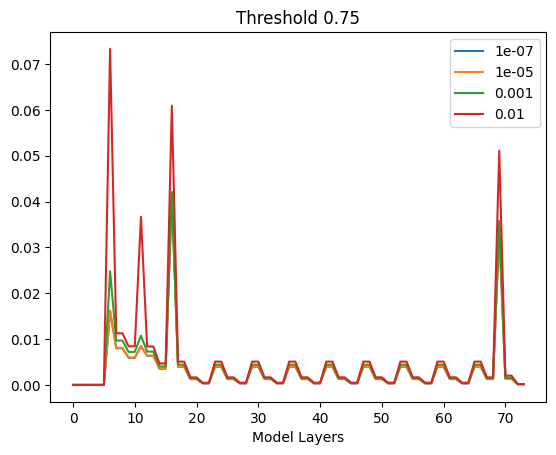

Epsilon: 1e-07, Skip count: 0.009511591397454295
Epsilon: 1e-05, Skip count: 0.009597817107394909
Epsilon: 0.001, Skip count: 0.011805440788555641
Epsilon: 0.01, Skip count: 0.016048837237232667


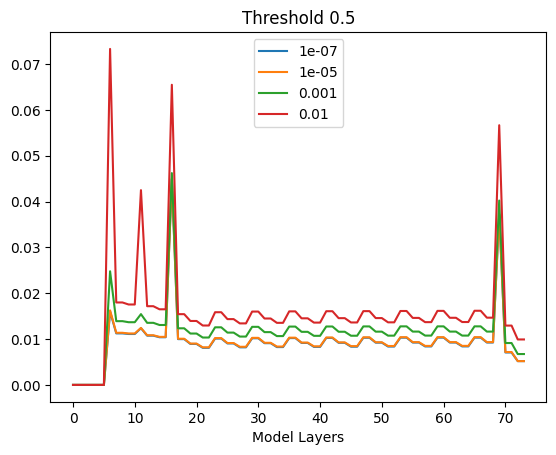

Epsilon: 1e-07, Skip count: 0.18781487957900012
Epsilon: 1e-05, Skip count: 0.18748559483802593
Epsilon: 0.001, Skip count: 0.18435832887299242
Epsilon: 0.01, Skip count: 0.2832047768898022


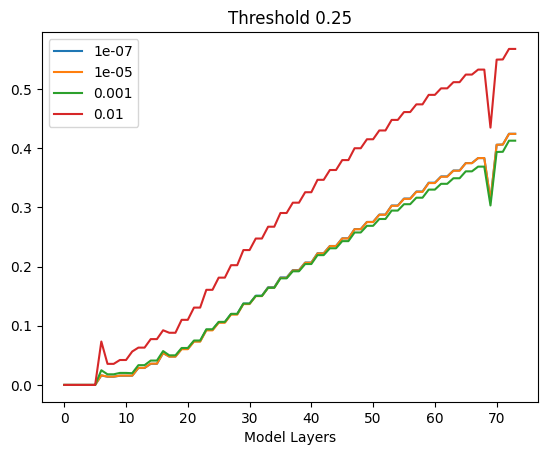

In [3]:
#AGGREGATE AGAINST DIFFERENT BATCH FILES

skip_count_grid = []

epsilons = {0: 1e-7, 1:1e-5, 2:1e-3, 3:1e-2}

for thresh in ['1', '0.75', '0.5', '0.25' ]:

    eps_tmp = []

    for eps in epsilons.keys():
        diff_skip_counts = []
        tmp = []
        for batch in ['', '_batch2', '_batch3', '_batch4', '_batch5', '_batch6', '_batch7', '_batch8', '_batch9', '_batch10', ]:
            
            with open(f"output/nan_xception_test{batch}_{thresh}_{eps}.out", "r") as f:
                for line in f:
                    match = re.search(r"DIFF SKIP count tensor\((\d+)\) (\d+)", line)
                    if match:
                        tensor_value = float(match.group(1))
                        total_value = float(match.group(2))
                        tmp.append(tensor_value/total_value)
                    match = re.search(r"real\t\d+m\d+\.\d+s", line)

                    if match:
                        diff_skip_counts.append(tmp)
                        tmp = []

            
        diff_skip_counts = np.array(diff_skip_counts)
        eps_tmp.append(diff_skip_counts.mean(0))
        # print(diff_skip_counts.shape)
    #     break
    # break
        print(f"Epsilon: {epsilons[eps]}, Skip count: {diff_skip_counts.mean()}")

        plt.plot(diff_skip_counts.mean(0), label=f"{epsilons[eps]}")

    skip_count_grid.append(eps_tmp)
    plt.legend()
    plt.xlabel('Model Layers')
    plt.title(f'Threshold {thresh}')
    plt.show();
                

/tmp/ipykernel_2262713/2039183640.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=40)


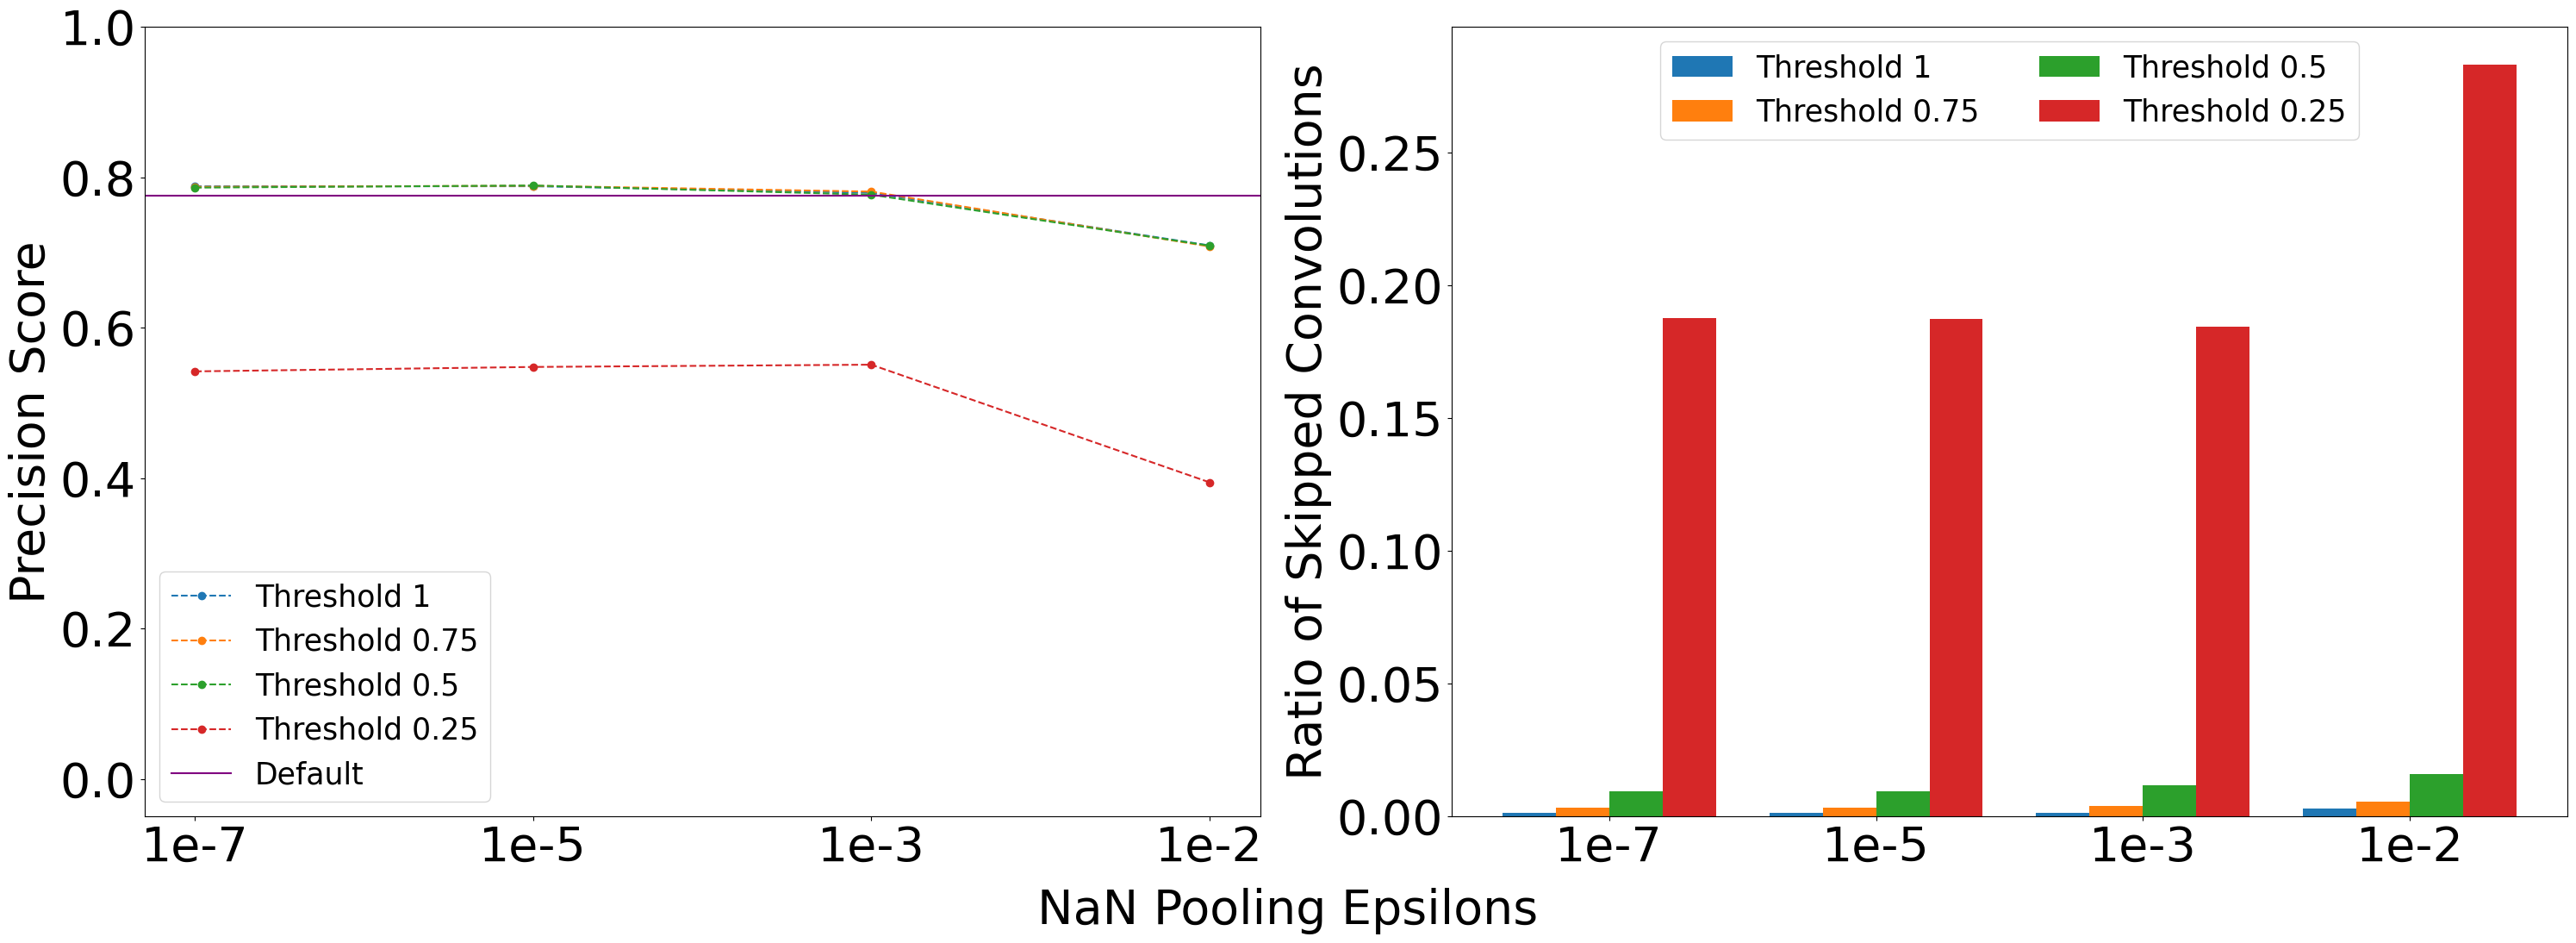

In [12]:
# Assume skip_count_grid is already defined as a NumPy array
skip_means = np.array(skip_count_grid).mean(-1)  # Shape: [num_thresholds, num_epsilons]

# Use Plotly's default qualitative colors
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA']  # 4 thresholds
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']  # 4 thresholds

# Bar parameters
bar_width = 0.2
offsets = [0.0, 0.2, 0.4, 0.6]  # Offset each threshold bar
x_base = [0, 1, 2, 3]  # Now represents epsilons

fig, ax = plt.subplots(1, 2, figsize=(30, 11))

# Plot metric curves (left)
for thresh in metrics:
    for num, m in enumerate(metrics[thresh]):
        if m != 'F1':
            continue
        if thresh == 'baseline':
            ax[0].axhline(y=metrics[thresh][m], color='purple', label='Default')
        else:
            ax[0].plot(metrics[thresh][m], marker='o', linestyle='dashed', label=f"Threshold {thresh}")

ax[0].set_xticks(np.arange(4), ['1e-7', '1e-5', '1e-3', '1e-2'], fontsize=40)
ax[0].legend(prop={'size': 25})
ax[0].set_ylim(-0.05, 1)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=40)
ax[0].set_ylabel(f"{m} Score", fontsize=40)
# ax[0].set_xlabel("NaN Pooling Epsilons", fontsize=40)

# Bar chart (right): x = NaN epsilons, color = threshold
for eps_idx, x in enumerate(x_base):  # 4 epsilons
    for thresh_idx in range(4):       # 4 thresholds per epsilon
        ax[1].bar(
            x + offsets[thresh_idx],
            skip_means[thresh_idx][eps_idx],
            width=bar_width,
            color=colors[thresh_idx],
        )

# Custom x-axis ticks and labels
ax[1].set_xticks([x + 0.3 for x in x_base])  # Centered under each group
ax[1].set_xticklabels(['1e-7', '1e-5', '1e-3', '1e-2'])
ax[1].tick_params(axis='both', labelsize=40)
# ax[1].set_xlabel('NaN Pooling Epsilons', fontsize=40)
fig.supxlabel('NaN Pooling Epsilons', fontsize=40)
ax[1].set_ylabel('Ratio of Skipped Convolutions', fontsize=40)

# Add legend for thresholds
ax[1].legend(['Threshold 1', 'Threshold 0.75', 'Threshold 0.5', 'Threshold 0.25'], prop={'size': 25}, loc='upper center', ncol=2)

plt.tight_layout()
plt.savefig('/scratch/ine5/fastsurfer_embeddings/fastsurfer-embeddings/UNET-nan-operations/depth_sep_conv/xception.pdf', format='pdf')
plt.show()
